In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import linear_model, datasets

In [58]:
# 引入一些数据来玩
iris = datasets.load_iris()
# 我们只采用样本数据的前两个feature
X = iris.data
Y = iris.target

In [59]:
set(Y)

{0, 1, 2}

In [19]:
 linear_model.*?

In [27]:
logreg = linear_model.LogisticRegression(C=1e5)

# 我们创建了一个 Neighbours Classifier 的实例，并拟合数据。
logreg.fit(X, Y)

LogisticRegression(C=100000.0, class_weight=None, dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='ovr', n_jobs=1, penalty='l2', random_state=None,
          solver='liblinear', tol=0.0001, verbose=0, warm_start=False)

In [56]:
h=0.2
x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
Z = logreg.predict(np.c_[xx.ravel(), yy.ravel()])

ValueError: X has 2 features per sample; expecting 4

In [21]:
plt.cm.Paired.colors

((0.6509803921568628, 0.807843137254902, 0.8901960784313725),
 (0.12156862745098039, 0.47058823529411764, 0.7058823529411765),
 (0.6980392156862745, 0.8745098039215686, 0.5411764705882353),
 (0.2, 0.6274509803921569, 0.17254901960784313),
 (0.984313725490196, 0.6039215686274509, 0.6),
 (0.8901960784313725, 0.10196078431372549, 0.10980392156862745),
 (0.9921568627450981, 0.7490196078431373, 0.43529411764705883),
 (1.0, 0.4980392156862745, 0.0),
 (0.792156862745098, 0.6980392156862745, 0.8392156862745098),
 (0.41568627450980394, 0.23921568627450981, 0.6039215686274509),
 (1.0, 1.0, 0.6),
 (0.6941176470588235, 0.34901960784313724, 0.1568627450980392))

In [50]:
logreg.coef_

array([[ 1.5092384 ,  4.90771824, -7.78408423, -3.80635529],
       [-0.2523313 , -2.7790203 ,  1.29886986, -2.70354826],
       [-2.4668559 , -6.63676185,  9.35798626, 18.14337932]])

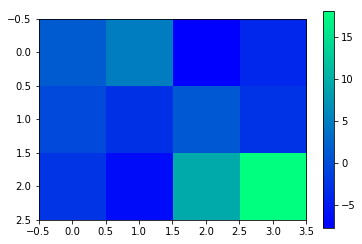

In [55]:
plt.imshow(logreg.coef_,cmap=plt.cm.winter)
plt.colorbar()
plt.show()

In [34]:
logreg.score(X,Y)

0.98

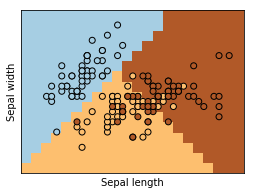

In [29]:
# 将结果放入彩色图中
Z = Z.reshape(xx.shape)
plt.figure(1, figsize=(4, 3))
plt.pcolormesh(xx, yy, Z, cmap=plt.cm.Paired)

# 将训练点也同样放入彩色图中
plt.scatter(X[:, 0], X[:, 1], c=Y, edgecolors='k', cmap=plt.cm.Paired)
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')

plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.xticks(())
plt.yticks(())

plt.show()